<a href="https://colab.research.google.com/github/jeffin95/jeffin95/blob/main/B2_T10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [ ]:
nd = pd.read_csv('us_disaster_declarations_1 (1).csv')

In [ ]:
nd.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,hash,last_refresh,id
0,EM-3541-AR,3541,AR,EM,2020-08-27T09:00:00Z,2020,Hurricane,Hurricane Laura,0,0,...,2020-08-28T23:00:00Z,2021-05-24T23:59:00Z,5131,99131,Sebastian (County),20250,NaN,faf01c718335e81b32ad4e24273fb64809c3448a,2022-04-26T19:01:44Z,60c3b861a0ee349d710ade97
1,EM-3541-AR,3541,AR,EM,2020-08-27T09:00:00Z,2020,Hurricane,Hurricane Laura,0,0,...,2020-08-28T23:00:00Z,2021-05-24T23:59:00Z,5143,99143,Washington (County),20250,NaN,f67274aed9f248a7c3a201a928221b9d26e8feef,2022-04-26T19:01:44Z,60c3b861a0ee349d710adebf
2,EM-3541-AR,3541,AR,EM,2020-08-27T09:00:00Z,2020,Hurricane,Hurricane Laura,0,0,...,2020-08-28T23:00:00Z,2021-05-24T23:59:00Z,5079,99079,Lincoln (County),20250,NaN,e5f25604660ea286f771c6845e0152e646398dbb,2022-04-26T19:01:44Z,60c3b861a0ee349d710addf6
3,EM-3541-AR,3541,AR,EM,2020-08-27T09:00:00Z,2020,Hurricane,Hurricane Laura,0,0,...,2020-08-28T23:00:00Z,2021-05-24T23:59:00Z,5073,99073,Lafayette (County),20250,NaN,2a012081fac9add3af85127bbc8bc0f68b355718,2022-04-26T19:01:44Z,60c3b861a0ee349d710addfa
4,EM-3541-AR,3541,AR,EM,2020-08-27T09:00:00Z,2020,Hurricane,Hurricane Laura,0,0,...,2020-08-28T23:00:00Z,2021-05-24T23:59:00Z,5087,99087,Madison (County),20250,NaN,7b0381cd5b6489d2daef14dcdff267ef3343f7c4,2022-04-26T19:01:44Z,60c3b861a0ee349d710ade1d


In [ ]:
nd.shape

(3031, 23)

In [ ]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     3031 non-null   object
 1   disaster_number             3031 non-null   int64 
 2   state                       3031 non-null   object
 3   declaration_type            3031 non-null   object
 4   declaration_date            3031 non-null   object
 5   fy_declared                 3031 non-null   int64 
 6   incident_type               3031 non-null   object
 7   declaration_title           3031 non-null   object
 8   ih_program_declared         3031 non-null   int64 
 9   ia_program_declared         3031 non-null   int64 
 10  pa_program_declared         3031 non-null   int64 
 11  hm_program_declared         3031 non-null   int64 
 12  incident_begin_date         3031 non-null   object
 13  incident_end_date           2950 non-null   obje

**Preprocessing**

*   Missing value handling



In [ ]:
nd.isna().sum()

fema_declaration_string          0
disaster_number                  0
state                            0
declaration_type                 0
declaration_date                 0
fy_declared                      0
incident_type                    0
declaration_title                0
ih_program_declared              0
ia_program_declared              0
pa_program_declared              0
hm_program_declared              0
incident_begin_date              0
incident_end_date               81
disaster_closeout_date        2345
fips                             0
place_code                       0
designated_area                  0
declaration_request_number       0
last_ia_filing_date           1987
hash                             0
last_refresh                     0
id                               0
dtype: int64

Droping columns which has more than 70% Null Value

In [ ]:
limit = len(nd) * 0.7
nd.dropna(axis=1, thresh=limit, inplace = True)
nd.isna().sum()

fema_declaration_string        0
disaster_number                0
state                          0
declaration_type               0
declaration_date               0
fy_declared                    0
incident_type                  0
declaration_title              0
ih_program_declared            0
ia_program_declared            0
pa_program_declared            0
hm_program_declared            0
incident_begin_date            0
incident_end_date             81
fips                           0
place_code                     0
designated_area                0
declaration_request_number     0
hash                           0
last_refresh                   0
id                             0
dtype: int64

Droping column which is irrelevent

In [ ]:
nd = nd.drop(["incident_end_date"],axis=1)

In [ ]:
nd.isna().sum()

fema_declaration_string       0
disaster_number               0
state                         0
declaration_type              0
declaration_date              0
fy_declared                   0
incident_type                 0
declaration_title             0
ih_program_declared           0
ia_program_declared           0
pa_program_declared           0
hm_program_declared           0
incident_begin_date           0
fips                          0
place_code                    0
designated_area               0
declaration_request_number    0
hash                          0
last_refresh                  0
id                            0
dtype: int64

**Outlier**

*   Detection and Handling



['disaster_number', 'fy_declared', 'ih_program_declared', 'ia_program_declared', 'pa_program_declared', 'hm_program_declared', 'fips', 'place_code', 'declaration_request_number']


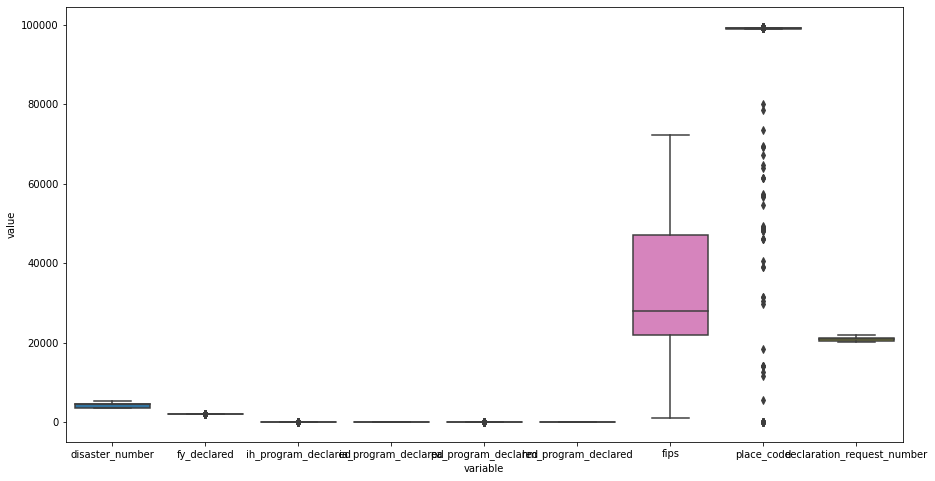

In [ ]:
col = list(nd.columns)
int64_col = [i for i in col if (nd[i].dtype == 'int64')]
print(int64_col)

df1 = pd.DataFrame(data = nd, columns = int64_col)

plt.figure(figsize=(15,8))
sns.boxplot(x="variable", y="value", data=pd.melt(df1))
plt.show()

In [ ]:
col2 = list(nd.columns)
obj_col = [i for i in col if (nd[i].dtype == 'object')]
print(obj_col)

df2 = pd.DataFrame(data = nd, columns = obj_col)

['fema_declaration_string', 'state', 'declaration_type', 'declaration_date', 'incident_type', 'declaration_title', 'incident_begin_date', 'designated_area', 'hash', 'last_refresh', 'id']


In [ ]:
df2.nunique()

fema_declaration_string     229
state                        47
declaration_type              3
declaration_date            227
incident_type                11
declaration_title           152
incident_begin_date         172
designated_area            1018
hash                       3031
last_refresh                 42
id                         3031
dtype: int64

In [ ]:
df2.value_counts(['incident_type'])

incident_type   
Hurricane           1177
Severe Ice Storm     952
Severe Storm(s)      340
Fire                 210
Flood                123
Tornado              107
Coastal Storm         69
Snow                  37
Other                  9
Mud/Landslide          5
Biological             2
dtype: int64

* Feature Reduction


In [ ]:
nd = nd.drop(['declaration_date','fy_declared','disaster_number','id','incident_begin_date','last_refresh','place_code','ia_program_declared'],axis=1)

In [ ]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     3031 non-null   object
 1   state                       3031 non-null   object
 2   declaration_type            3031 non-null   object
 3   incident_type               3031 non-null   object
 4   declaration_title           3031 non-null   object
 5   ih_program_declared         3031 non-null   int64 
 6   pa_program_declared         3031 non-null   int64 
 7   hm_program_declared         3031 non-null   int64 
 8   fips                        3031 non-null   int64 
 9   designated_area             3031 non-null   object
 10  declaration_request_number  3031 non-null   int64 
 11  hash                        3031 non-null   object
dtypes: int64(5), object(7)
memory usage: 284.3+ KB


In [ ]:
nd.head(10)

,fema_declaration_string,state,declaration_type,incident_type,declaration_title,ih_program_declared,pa_program_declared,hm_program_declared,fips,designated_area,declaration_request_number,hash
0,EM-3541-AR,AR,EM,Hurricane,Hurricane Laura,0,1,0,5131,Sebastian (County),20250,faf01c718335e81b32ad4e24273fb64809c3448a
1,EM-3541-AR,AR,EM,Hurricane,Hurricane Laura,0,1,0,5143,Washington (County),20250,f67274aed9f248a7c3a201a928221b9d26e8feef
2,EM-3541-AR,AR,EM,Hurricane,Hurricane Laura,0,1,0,5079,Lincoln (County),20250,e5f25604660ea286f771c6845e0152e646398dbb
3,EM-3541-AR,AR,EM,Hurricane,Hurricane Laura,0,1,0,5073,Lafayette (County),20250,2a012081fac9add3af85127bbc8bc0f68b355718
4,EM-3541-AR,AR,EM,Hurricane,Hurricane Laura,0,1,0,5087,Madison (County),20250,7b0381cd5b6489d2daef14dcdff267ef3343f7c4
5,EM-3541-AR,AR,EM,Hurricane,Hurricane Laura,0,1,0,5111,Poinsett (County),20250,93067889d8e578e3bd01ab505c538d602485de9b
6,EM-3541-AR,AR,EM,Hurricane,Hurricane Laura,0,1,0,5123,St. Francis (County),20250,b070a8a2a0b755379173ce45fdec371d719ec416
7,EM-3541-AR,AR,EM,Hurricane,Hurricane Laura,0,1,0,5091,Miller (County),20250,00f12489d0c6e6aa864cde675117b5523811d38f
8,EM-3541-AR,AR,EM,Hurricane,Hurricane Laura,0,1,0,5141,Van Buren (County),20250,825f292b4fc36ed224615a7be7fcc1c9bbd2699d
9,EM-3541-AR,AR,EM,Hurricane,Hurricane Laura,0,1,0,5097,Montgomery (County),20250,5c981d7fc12ad615c92b84641da91b8b5fa9266f


In [ ]:
nd['declaration_type'].value_counts()

DR    1690
EM    1209
FM     132
Name: declaration_type, dtype: int64

*   Feature Engineering



In [ ]:
nd['incident_type'] = nd['incident_type'] + nd['declaration_title']

In [ ]:
nd.drop('declaration_title',axis = 1,inplace=True)

In [ ]:
nd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     3031 non-null   object
 1   state                       3031 non-null   object
 2   declaration_type            3031 non-null   object
 3   incident_type               3031 non-null   object
 4   ih_program_declared         3031 non-null   int64 
 5   pa_program_declared         3031 non-null   int64 
 6   hm_program_declared         3031 non-null   int64 
 7   fips                        3031 non-null   int64 
 8   designated_area             3031 non-null   object
 9   declaration_request_number  3031 non-null   int64 
 10  hash                        3031 non-null   object
dtypes: int64(5), object(6)
memory usage: 260.6+ KB


**Exploratory Data Analysis**

In [ ]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))
nd['state'] = nd['state'].map(abbrev_to_us_state)
print (abbrev_to_us_state)
print (nd.state)

{'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia', 'AS': 'American Samoa', 'GU': 'Guam', 'MP': 'No

In [ ]:
labels = list(nd.state.unique())
labels

['Arkansas', 'Oregon', 'Louisiana', 'Washington', 'Montana', 'Wyoming', 'California', 'Colorado', 'Utah', 'Puerto Rico', 'Iowa', 'Mississippi', 'Alabama', 'Florida', 'North Dakota', 'Delaware', 'New York', 'North Carolina', 'Nevada', 'Texas', 'New Jersey', 'Oklahoma', 'Tennessee', 'District of Columbia', 'Georgia', 'Connecticut', 'Arizona', 'Maryland', 'Alaska', 'Idaho', 'South Dakota', 'Kentucky', 'New Mexico', 'Virginia', 'West Virginia', 'Hawaii', 'Michigan', 'Rhode Island', 'Massachusetts', 'Vermont', 'Missouri', 'Nebraska', 'Pennsylvania', 'New Hampshire', 'Illinois', 'Kansas', 'Maine']

In [ ]:
a = dict(nd.state.value_counts())
data = list()
for i in labels:
    data.append(a[i])

**Piechart of Disasters US(state wise)**

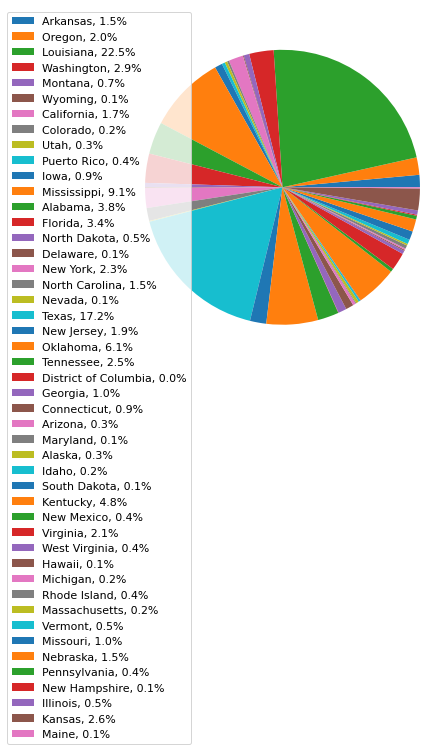

In [ ]:
sizes = data
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)

_, _ = ax1.pie(sizes)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
a = ["fema_declaration_string",'state','designated_area','hash','incident_type','declaration_type']
for i in np.arange(len(a)):
  nd[a[i]] = le.fit_transform(nd[a[i]])
nd.head()

,fema_declaration_string,state,declaration_type,incident_type,ih_program_declared,pa_program_declared,hm_program_declared,fips,designated_area,declaration_request_number,hash
0,96,3,1,118,0,1,0,5131,818,20250,2969
1,96,3,1,118,0,1,0,5143,950,20250,2915
2,96,3,1,118,0,1,0,5079,520,20250,2737
3,96,3,1,118,0,1,0,5073,491,20250,463
4,96,3,1,118,0,1,0,5087,548,20250,1456


In [ ]:
nd.select_dtypes(['int64']).corr()

,fema_declaration_string,state,declaration_type,incident_type,ih_program_declared,pa_program_declared,hm_program_declared,fips,designated_area,declaration_request_number,hash
fema_declaration_string,1.000000,-0.067755,0.885934,-0.353451,-0.348350,0.047889,-0.638622,-0.070170,0.043174,0.196365,-0.004139
state,-0.067755,1.000000,-0.096459,0.161893,0.058657,0.027603,0.100681,0.992637,-0.026319,0.251366,-0.042458
declaration_type,0.885934,-0.096459,1.000000,-0.437571,-0.346173,0.096825,-0.712830,-0.103563,0.034753,-0.213310,-0.012767
incident_type,-0.353451,0.161893,-0.437571,1.000000,0.055198,-0.019690,0.063680,0.156843,-0.057441,0.176640,0.014544
ih_program_declared,-0.348350,0.058657,-0.346173,0.055198,1.000000,-0.262088,0.339239,0.074061,0.003355,0.021487,-0.002102
pa_program_declared,0.047889,0.027603,0.096825,-0.019690,-0.262088,1.000000,-0.089615,-0.033299,-0.017718,-0.051433,-0.006886
hm_program_declared,-0.638622,0.100681,-0.712830,0.063680,0.339239,-0.089615,1.000000,0.104046,-0.009994,0.223431,-0.009071
fips,-0.070170,0.992637,-0.103563,0.156843,0.074061,-0.033299,0.104046,1.000000,-0.020835,0.257882,-0.039859
designated_area,0.043174,-0.026319,0.034753,-0.057441,0.003355,-0.017718,-0.009994,-0.020835,1.000000,0.005067,0.002870
declaration_request_number,0.196365,0.251366,-0.213310,0.176640,0.021487,-0.051433,0.223431,0.257882,0.005067,1.000000,0.003933


Correlation between all the numeric variables

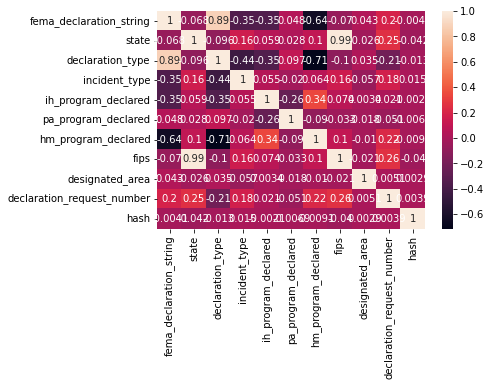

In [ ]:
sns.heatmap(nd.select_dtypes(['int64']).corr(),annot=True)
plt.show()

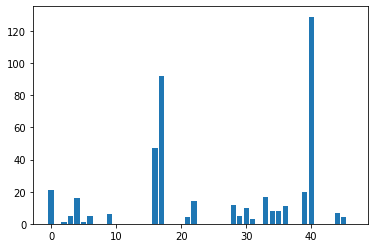

In [ ]:
summary=nd.groupby('state').ih_program_declared.sum()
plt.bar(x=summary.index , height=summary.values)
plt.show()

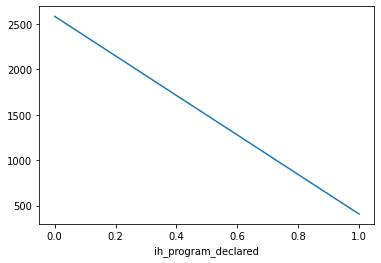

In [ ]:
nd.groupby('ih_program_declared').pa_program_declared.sum().plot(kind='line')
plt.show()

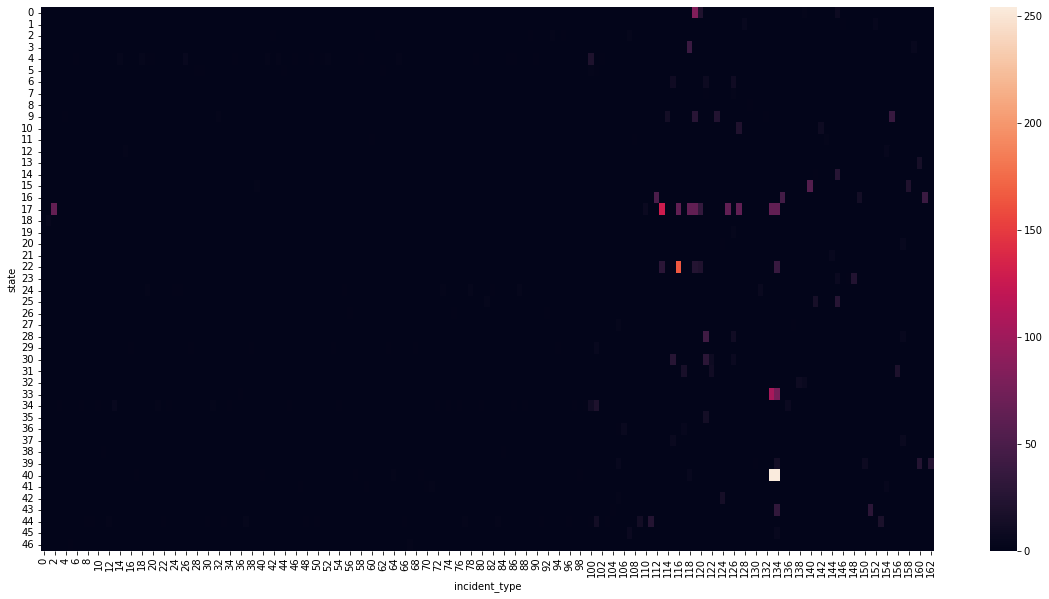

In [ ]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(pd.crosstab(nd.state,nd.incident_type))
plt.show()

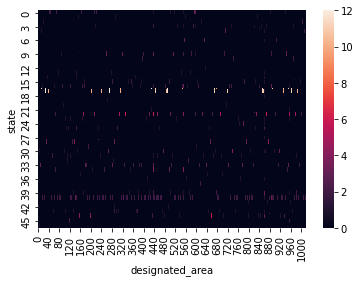

In [ ]:
sns.heatmap(pd.crosstab(nd.state,nd.designated_area))
plt.show()

Spliting Values



In [ ]:
X = nd.drop(['declaration_type'],axis = 1)
Y = nd['declaration_type']

*   Normalization



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [ ]:
scaler = MinMaxScaler()
nd=scaler.fit_transform(nd)

In [ ]:
pd.DataFrame(nd)


,0,1,2,3,4,5,6,7,8,9,10
0,0.421053,0.065217,0.5,0.728395,0.0,1.0,0.0,0.058065,0.804326,0.034984,0.979868
1,0.421053,0.065217,0.5,0.728395,0.0,1.0,0.0,0.058233,0.934120,0.034984,0.962046
2,0.421053,0.065217,0.5,0.728395,0.0,1.0,0.0,0.057334,0.511308,0.034984,0.903300
3,0.421053,0.065217,0.5,0.728395,0.0,1.0,0.0,0.057249,0.482793,0.034984,0.152805
4,0.421053,0.065217,0.5,0.728395,0.0,1.0,0.0,0.057446,0.538840,0.034984,0.480528
...,...,...,...,...,...,...,...,...,...,...,...
3026,0.416667,0.326087,0.0,0.975309,0.0,1.0,1.0,0.269801,0.896755,0.997847,0.380858
3027,0.416667,0.326087,0.0,0.975309,0.0,1.0,1.0,0.269351,0.766962,0.997847,0.726403
3028,0.416667,0.326087,0.0,0.975309,0.0,1.0,1.0,0.269379,0.771878,0.997847,0.561056
3029,0.416667,0.326087,0.0,0.975309,0.0,1.0,1.0,0.269661,0.844641,0.997847,0.861056


In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
N = preprocessing.normalize(nd)
pd.DataFrame(N)

,0,1,2,3,4,5,6,7,8,9,10
0,0.222727,0.034498,0.264488,0.385304,0.0,0.528976,0.000000,0.030715,0.425470,0.018506,0.518327
1,0.217002,0.033612,0.257690,0.375400,0.0,0.515380,0.000000,0.030012,0.481427,0.018030,0.495819
2,0.241332,0.037380,0.286581,0.417489,0.0,0.573163,0.000000,0.032861,0.293063,0.020051,0.517738
3,0.282399,0.043741,0.335349,0.488533,0.0,0.670697,0.000000,0.038397,0.323808,0.023464,0.102486
4,0.266945,0.041347,0.316997,0.461798,0.0,0.633995,0.000000,0.036420,0.341621,0.022180,0.304652
...,...,...,...,...,...,...,...,...,...,...,...
3026,0.181868,0.142331,0.000000,0.425705,0.0,0.436482,0.436482,0.117763,0.391418,0.435542,0.166238
3027,0.179051,0.140127,0.000000,0.419112,0.0,0.429723,0.429723,0.115746,0.329581,0.428798,0.312152
3028,0.182545,0.142861,0.000000,0.427290,0.0,0.438107,0.438107,0.118017,0.338165,0.437164,0.245803
3029,0.173695,0.135935,0.000000,0.406575,0.0,0.416869,0.416869,0.112413,0.352104,0.415971,0.358947


**Modelling**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size = 0.3)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
Logit_model = LogisticRegression()
Logit_model.fit(X_train,Y_train)
y_pred = Logit_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average = 'weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average = 'weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average = 'weighted'))

Accuracy is : 0.9648351648351648
Precision is : 0.9354966815362855
Recall is : 0.9648351648351648
F1 is : 0.9495785406825661


In [ ]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
sl=svm_linear.fit(x_train,y_train)
y_pred = svm_linear.predict(x_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Precision is :',precision_score(y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(y_test,y_pred,average='weighted'))

Accuracy is : 0.9986807387862797
Precision is : 0.9986850642328821
Recall is : 0.9986807387862797
F1 is : 0.9986810449734983


In [ ]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
Logit_model = LogisticRegression()
Logit_model.fit(X_train,Y_train)
y_pred = Logit_model.predict(X_test)

In [ ]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9989010989010989
Precision is : 0.9989040293040293
Recall is : 0.9989010989010989
F1 is : 0.998901289007583


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
y_pred = dt_model.predict(X_test)

In [ ]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 0.9571428571428572
Precision is : 0.9738789910290541
Recall is : 0.9571428571428572
F1 is : 0.9622304687698949


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)

In [ ]:
print('Accuracy is :',accuracy_score(Y_test,y_pred))
print('Precision is :',precision_score(Y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(Y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(Y_test,y_pred,average='weighted'))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
F1 is : 1.0


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [ ]:
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Precision is :',precision_score(y_test,y_pred,average='weighted'))
print('Recall is :',recall_score(y_test,y_pred,average='weighted'))
print('F1 is :',f1_score(y_test,y_pred,average='weighted'))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
F1 is : 1.0


**Model fine Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from random import randint

In [502]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(0, 500),
              "min_samples_leaf": randint(0, 500),
              "criterion": ["gini", "entropy"]}

In [503]:
dt_tng = RandomizedSearchCV(dt_model, param_dist, cv=5)

In [504]:
dt_tng.fit(x_train,y_train)

TypeError: ignored

In [505]:
print("Tuned Decision Tree Parameters: {}".format(dt_tng.best_params_))
print("Best score is {}".format(dt_tng.best_score_))

AttributeError: ignored